## Analysis of stock prices using SVD / Notebook 2

In this notebook you will read the file `SP500.csv` that you prepared in notebook 1 into a `Spark` dataframe and then use the code in `lib/spark_PCA.py` to perform PCA on the diff sequences.

We start by starting a spark Context and reading the file into a dataframe.

In [1]:
import pandas as pd
import pickle
import numpy as np
%pylab inline
# read the file in a dataframe.
df=pd.read_csv('data/SP500.csv')
df.head()

Populating the interactive namespace from numpy and matplotlib


,Date,test/8_D,test/8_P,train/HD_D,train/HD_P,train/DOV_D,train/DOV_P,test/86_D,test/86_P,train/RTN_D,...,test/3_D,test/3_P,train/YUM_D,train/YUM_P,train/ECL_D,train/ECL_P,train/KMB_D,train/KMB_P,train/XOM_D,train/XOM_P
0,1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Extract the tickers from the column names of `df`

In [2]:
#del below
columns=df.columns
col=[c for c in columns if '_D' in c]
tickers=[a[:-2] for a in col]
#del above
tickers[:10],len(tickers)

(['test/8',
  'train/HD',
  'train/DOV',
  'test/86',
  'train/RTN',
  'train/TXT',
  'test/37',
  'train/BCR',
  'train/SBUX',
  'train/MCO'],
 481)

(13422, 481)

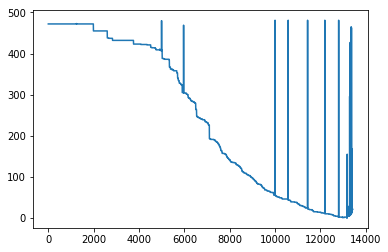

In [3]:
Rows=np.array(df.loc[:,col])
nans=np.sum(np.isnan(Rows),axis=1)
plot(nans)
Rows.shape

In [4]:
Rows=np.nan_to_num(Rows)
Rows.shape,Rows[:2,:10]

((13422, 481), array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

In [5]:
Mean=np.zeros((1,Rows.shape[1]))
Mean[0,:]=np.mean(Rows,axis=0)
Mean.shape

(1, 481)

In [6]:
Rows=Rows-Mean
np.mean(abs(np.mean(Rows,axis=0)))

9.523970128263608e-20

In [7]:
u, s, v = np.linalg.svd(Rows,full_matrices=False)

In [8]:
u.shape,s.shape,v.shape

((13422, 481), (481,), (481, 481))

In [9]:
pickle.dump({'u':u,'s':s,'v':v},open('data/svd.pickle','bw'))

In [10]:
np.dot(u[:,0],u[:,2])

3.0704605524789486e-16

### Compute percentage-of-variance explained graph
Write code to plot the percentage of variance explained as a function of the number of top eigen-vectors used.

You should get a figure similar to this:

![percent-var-explained](figs/percentageOfVarianceExplained.png)

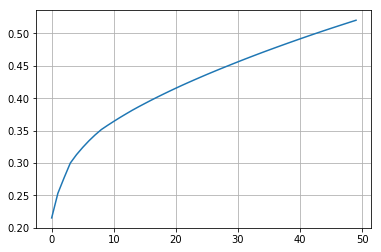

In [11]:
cums=cumsum(s**2) # singular values are the sqrt of eigen-values
cums/=cums[-1]

plot(cums[0:50])
grid()

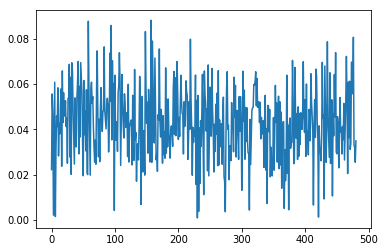

In [12]:
plot(v[0,:])

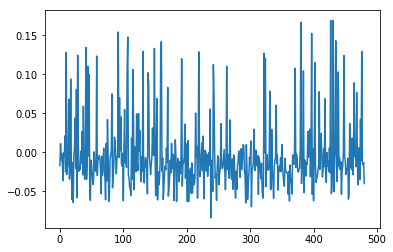

In [13]:
plot(v[1,:])

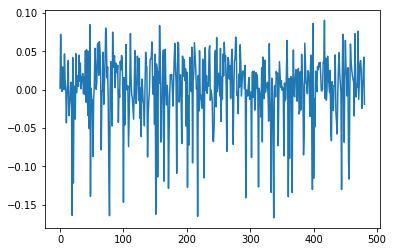

In [14]:
plot(v[2,:])

## SVD and low rank approximations


Consider a data '''X''', with column-wise zero [[empirical mean]] (the sample mean of each column has been shifted to zero), where each of the ''n'' rows represents a different repetition of the experiment, and each of the ''p'' columns gives a particular kind of feature (say, the results from a particular sensor).

PCA is based on a spectral decomposition of the covariance matrix $\Sigma$.
$\Sigma = U S U^T$ Where $U$ is an orthonormal matrix and $S$ is a diagonal matrix. The elements of the diagonal of $S$ are the eigen-values corresponding to the eigen-vectors of $\Sigma$ which are also the variances along the principal directions defined by $\Sigma$.

[**Singular Value Decomposition**](https://en.wikipedia.org/wiki/Singular-value_decomposition) or SVD is more general than Eigen-Decomposition. If $M$ is an $m\times n$ matrix (not necessarily square), then it can be written in the form $M=USV^T$
Where:
* $U$ is an $m \times m$ orthonormal matrix. 
* $S$ is an $m \times n$ matrix in which only the diagonal entries can be non-zero
* $V$ is an $n \times n$ orthonormal matrix.

### Relation to PCA

If $M$ is the covariance matrix, i.e. a symmetric real valued matrix, then $U=V$ and we get the PCA decomposition.

### Singular values and singular vectors

Similarly to the eigen-decomposition, the SVD matrices can be interpreted as eigen-vectors. If we denote by $U_i$ and $V_i$ the $i$'th columns of $U$ and $V$ respectively, and by $s_i$ the $i$-th element of the diagonal of $S$, then $U_i M = s_i V_i$ and $M V_i = s_i U_i$ also


### Checking your calculations
One good way to check your calculations is to create a scatter-plot projecting the data on two of the largest variance eigen-vectors.

In the directory `figs` you will find scatter plots corresponding to the six combinations of the top 4 eigenvectors.

In these scatter-plots the ticker is replaced by the sector ID.

Stocks from the same sector tend to have similar fluctuations. That is because they have similar sensitivities to costs (labor cost, energy) and profits (income distribution, holiday shopping). For example check out `figs/scatter.2.1.pdf` in which regions that are dominated by Finance, Energy or IT have been marked. 

It is not a requirement, but if you want to reassure yourself that you have done things right, we recommend that you create similar scatter plots and compare with those given. Your scatter-plots will be slightly different, because of the stocks you have eliminated, but spectral analysis is pretty robust, so your scatter plots should be quite similar (remember that the inverse of an eigen-vector is also an eigen-vector, so horizontal or vertical reflections of the scatter plot are meaningless).

In [15]:
!ls data

SP500.csv	 student_tickers.csv  tickerInfo.tsv  tickers.txt
spectral.pickle  svd.pickle	      Tickers.pkl


In [16]:
import pickle
Tickers=pickle.load(open('data/Tickers.pkl','br'))
type(Tickers['TickerInfo'])

pandas.core.frame.DataFrame

In [17]:
import pandas as pd

In [18]:
#TickerInfo=pd.read_csv('data/SP5Info.csv')
TickerInfo=Tickers['TickerInfo']
TickerInfo.head()

,Ticker,Name,Sector,SECTOR_ID
0,MMM,3M|3M Company,Industrials,INDS
1,ABT,Abbott Laboratories,Health Care,HC
2,ABBV,AbbVie Inc.,Health Care,HC
3,ACN,Accenture plc,Information Technology,IT
4,ATVI,Activision Blizzard,Information Technology,IT


In [19]:
## Del below until KNN section
# Create a dictionary that maps tickers to sector IDs
NN=TickerInfo[['Ticker','SECTOR_ID']]
Ticker2Sector={ a[1]:a[2] for a in NN.to_records()}
sectors=[]
unknown=known=0
for i in range(len(tickers)):
    ticker=tickers[i]
    if 'train' in ticker:
        ticker=ticker[6:]
    if ticker in Ticker2Sector:
        sectors.append(Ticker2Sector[ticker])
        known+=1
    else:
        sectors.append(ticker)
        unknown+=1
        #print('missing category for ',ticker)
print('%d known category, %d unknown category'%(known,unknown))

392 known category, 89 unknown category


In [20]:
# Generate the scatter plot of the stocks on a pair of eigen-vectors defined by i0,i1
eigvec=v.transpose()
def Scatter_Stocks(i0=0,i1=1):
    fig, ax = plt.subplots(figsize=(20,20));  # In order that the stock ticker names are readable we make the plot very large
    plt.xlim([np.amin(eigvec[:,i0]),np.amax(eigvec[:,i0])]);
    plt.ylim([np.amin(eigvec[:,i1]),np.amax(eigvec[:,i1])]);
    plt.title('SP500 stocks scatter on '+str(i0)+', '+str(i1),fontsize=20);
    plt.xlabel('Coeff %d'%i0);
    plt.ylabel('Coeff %d'%i1);
    for i in range(len(tickers)):
        ax.annotate(sectors[i], (eigvec[i,i0],eigvec[i,i1]),fontsize=10);
    # This very large plot is hard to view and manipulate inside the notebook. We therefor export it into a pdf file
    fig.savefig('figs/scatter.'+str(i0)+'.'+str(i1)+'.pdf', format='PDF');
    # After exporting, we clear the figure so that the plot does not appear in the notebook.
    fig.clear();
    return None

In [21]:
for i0 in range(4):
    for i1 in range(i0):
        print(i0,i1)
        Scatter_Stocks(i0,i1);

1 0
2 0
2 1
3 0
3 1
3 2


<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [33]:
!rm figs/scatter.?.?.pdf

In [23]:
!open figs/scatter.2.1.pdf

/bin/sh: 1: open: not found
